Overall average response time: 70.05 minutes
  support_case_vertical  response_time_minutes
4            vertical_5             506.691667
1            vertical_2              79.000565
3            vertical_4              67.583627
2            vertical_3              42.614444
0            vertical_1              30.504630
Overall CSAT: 55.17%

Top 3 Verticals by CSAT:
Vertical: vertical_5, CSAT: 100.00%
Vertical: vertical_4, CSAT: 55.71%
Vertical: vertical_1, CSAT: 55.56%

Bottom 3 Verticals by CSAT:
Vertical: vertical_1, CSAT: 55.56%
Vertical: vertical_2, CSAT: 54.29%
Vertical: vertical_3, CSAT: 36.67%

CSAT by Escalation Status (in percentages):
Escalation Status: False, CSAT: 69.54%
Escalation Status: True, CSAT: 45.53%

Top 5 Languages by CSAT:
Language: fi, CSAT: 100.00%
Language: gb, CSAT: 100.00%
Language: hu, CSAT: 100.00%
Language: no, CSAT: 88.89%
Language: sw, CSAT: 85.71%

CSAT by User Persona:
Persona: persona_10, CSAT: 100.00%
Persona: persona_12, CSAT: 66.67%
Persona:

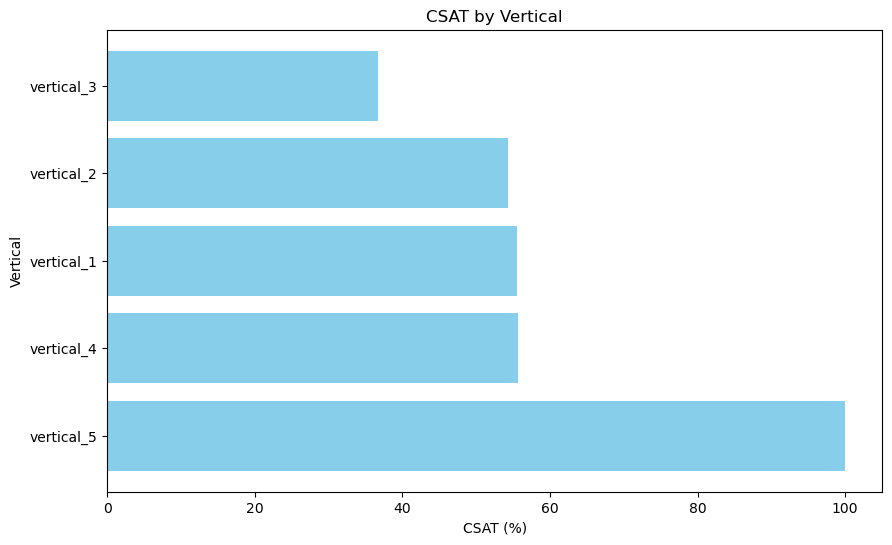

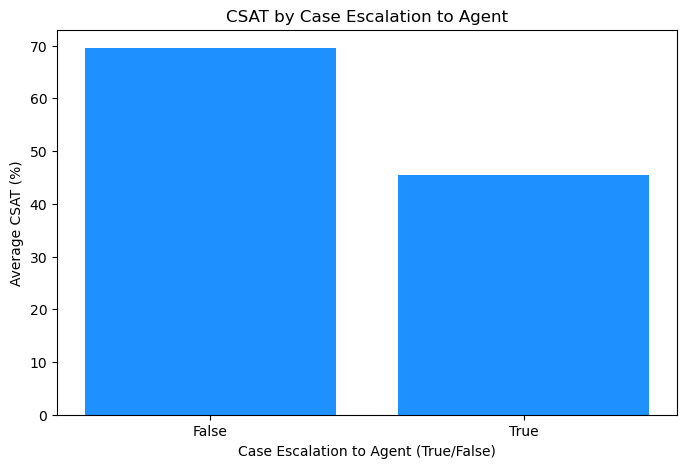

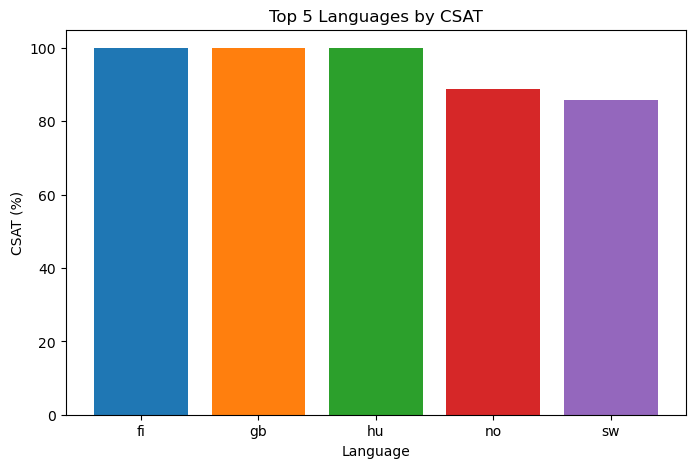

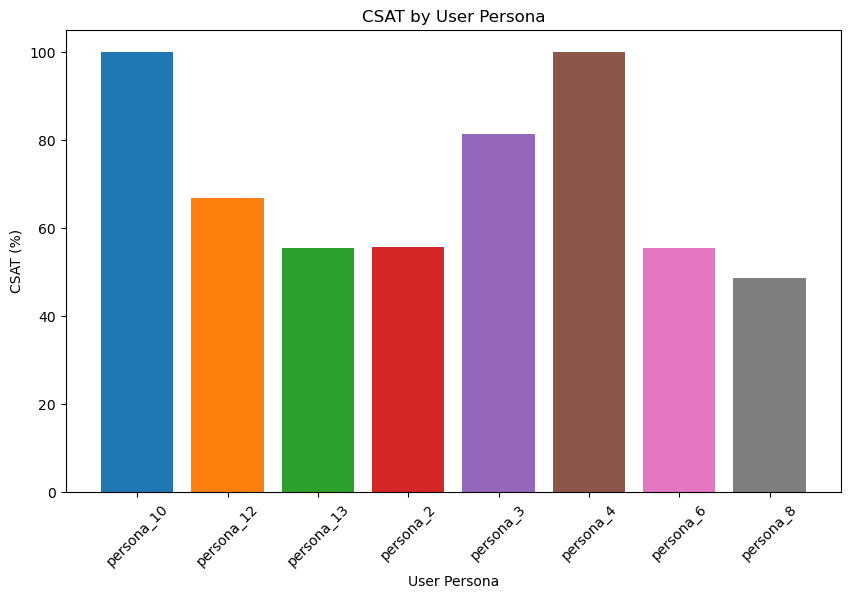

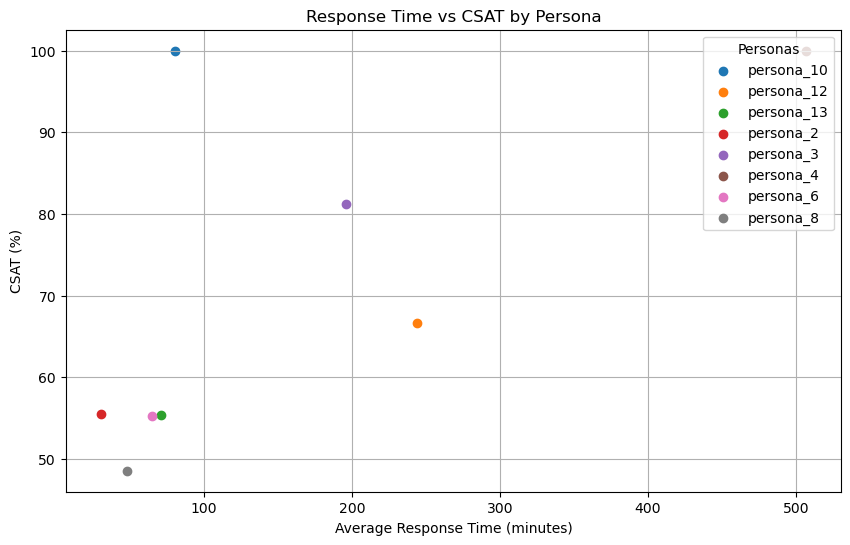

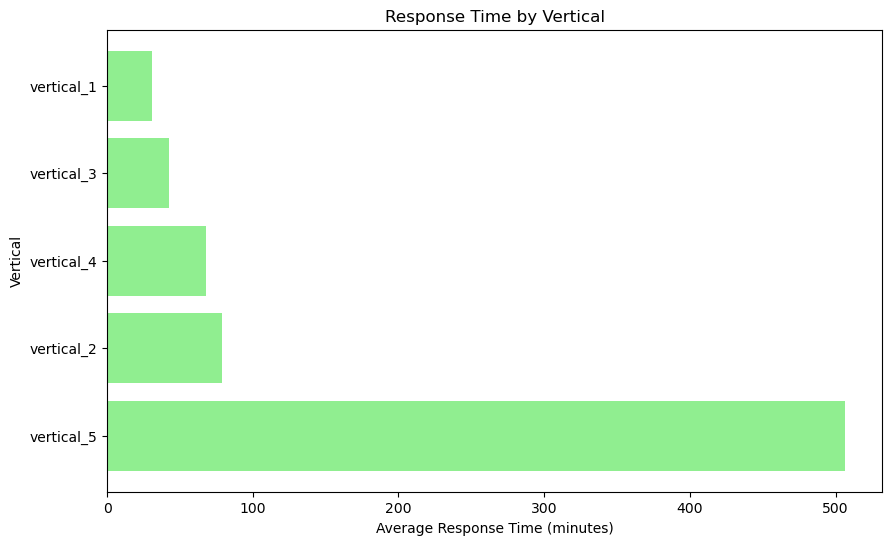


Case Count by Vertical:
  support_case_vertical  case_count
3            vertical_4        1761
1            vertical_2         560
2            vertical_3          30
0            vertical_1          18
4            vertical_5           2

Vertical 5 Analysis: 
Vertical 5 has 2 cases, which explains its 100% CSAT score despite the long response time.


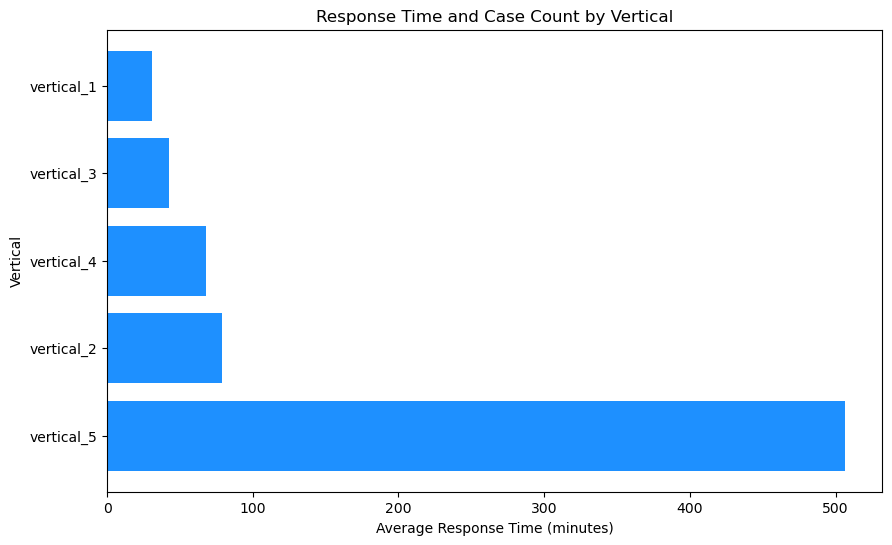

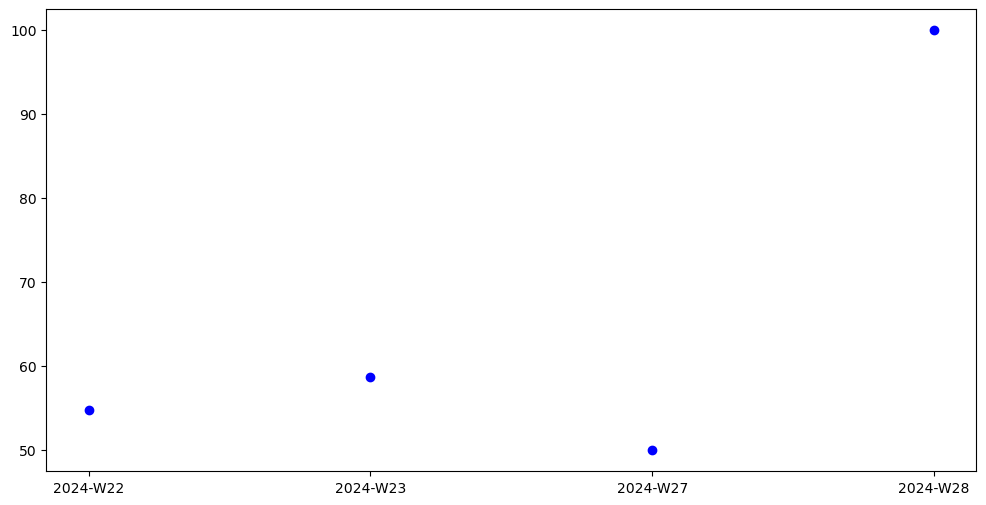

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
sc_dataFrame = pd.read_csv('support_case.csv')
sci_dataFrame = pd.read_csv('support_case_interaction.csv')

# Merge the two datasets on 'support_case_id'
merged_df = pd.merge(sc_dataFrame, sci_dataFrame, on='support_case_id')

# Map 'good' and 'bad' to 1 and 0 for CSAT
merged_df['interaction_status'] = merged_df['interaction_option'].map({'good': 1, 'bad': 0})
merged_df = merged_df[merged_df['interaction_option'].isin(['good', 'bad'])]

# Convert date fields to datetime
merged_df['request_created'] = pd.to_datetime(merged_df['request_created'], utc=True)
merged_df['response_created'] = pd.to_datetime(merged_df['response_created'], utc=True)

# Calculate response time in minutes
merged_df['response_time_minutes'] = (merged_df['response_created'] - merged_df['request_created']).dt.total_seconds() / 60

# calculate overall average response time
overall_average_response_time = merged_df['response_time_minutes'].mean()
print(f"Overall average response time: {overall_average_response_time:.2f} minutes")


# grouping and calculating response time by vertical
vertical_response_time_minutes = merged_df.groupby('support_case_vertical')['response_time_minutes'].mean().reset_index()
vertical_response_time = vertical_response_time_minutes.sort_values(by='response_time_minutes', ascending=False)

print(vertical_response_time)


# Step 1: Overall CSAT
overall_csat = merged_df['interaction_status'].mean() * 100  # Convert to percentage
print(f"Overall CSAT: {overall_csat:.2f}%")

# Step 2: CSAT by vertical
vertical_csat = merged_df.groupby('support_case_vertical')['interaction_status'].mean().reset_index(name='csat')
vertical_csat['csat'] = vertical_csat['csat'] * 100  # Convert to percentage
sorted_vertical_csat = vertical_csat.sort_values(by='csat', ascending=False)

# Print the top and bottom verticals by CSAT
top_three_verticals = sorted_vertical_csat.head(3)
bottom_three_verticals = sorted_vertical_csat.tail(3)

print("\nTop 3 Verticals by CSAT:")
for index, row in top_three_verticals.iterrows():
    print(f"Vertical: {row['support_case_vertical']}, CSAT: {row['csat']:.2f}%")

print("\nBottom 3 Verticals by CSAT:")
for index, row in bottom_three_verticals.iterrows():
    print(f"Vertical: {row['support_case_vertical']}, CSAT: {row['csat']:.2f}%")

# Step 3: Correlation between Case Escalation and CSAT
merged_df['is_support_case_escalated_to_agent'] = merged_df['is_support_case_escalated_to_agent'].fillna(0).astype(int)

escalation_csat = merged_df.groupby('is_support_case_escalated_to_agent')['interaction_status'].mean().reset_index(name='average_csat')
escalation_csat['average_csat'] = escalation_csat['average_csat'] * 100  # Convert to percentage
escalation_csat['is_support_case_escalated_to_agent'] = escalation_csat['is_support_case_escalated_to_agent'].map({0: 'False', 1: 'True'})

# Print CSAT by Escalation Status
print("\nCSAT by Escalation Status (in percentages):")
for index, row in escalation_csat.iterrows():
    print(f"Escalation Status: {row['is_support_case_escalated_to_agent']}, CSAT: {row['average_csat']:.2f}%")

# Step 4: CSAT by Language
language_csat = merged_df.groupby('support_case_language')['interaction_status'].mean().reset_index(name='average_csat')
language_csat['average_csat'] = language_csat['average_csat'] * 100  # Convert to percentage

sorted_language_csat = language_csat.sort_values(by='average_csat', ascending=False)
top_five_languages = sorted_language_csat.head(5)
print("\nTop 5 Languages by CSAT:")
for index, row in top_five_languages.iterrows():
    print(f"Language: {row['support_case_language']}, CSAT: {row['average_csat']:.2f}%")

# Step 5: CSAT by Persona
persona_csat = merged_df.groupby('support_case_user_persona')['interaction_status'].mean().reset_index(name='average_csat')
persona_csat['average_csat'] = persona_csat['average_csat'] * 100  # Convert to percentage

print("\nCSAT by User Persona:")
for index, row in persona_csat.iterrows():
    print(f"Persona: {row['support_case_user_persona']}, CSAT: {row['average_csat']:.2f}%")

# Step 6: Response Time Impact on CSAT by Persona
persona_response_time = merged_df.groupby('support_case_user_persona')['response_time_minutes'].mean().reset_index()
persona_response_time.columns = ['support_case_user_persona', 'avg_response_time']

# Merge with persona CSAT data
persona_response_time = pd.merge(persona_response_time, persona_csat, on='support_case_user_persona')

# Visualizations using Matplotlib

# Bar chart for verticals by CSAT
plt.figure(figsize=(10,6))
plt.barh(sorted_vertical_csat['support_case_vertical'], sorted_vertical_csat['csat'], color='skyblue')
plt.xlabel('CSAT (%)')
plt.ylabel('Vertical')
plt.title('CSAT by Vertical')
plt.show()

# Bar chart for CSAT by escalation
plt.figure(figsize=(8,5))
plt.bar(escalation_csat['is_support_case_escalated_to_agent'], escalation_csat['average_csat'], color='dodgerblue')
plt.xlabel('Case Escalation to Agent (True/False)')
plt.ylabel('Average CSAT (%)')
plt.title('CSAT by Case Escalation to Agent')
plt.show()

# Bar chart for top 5 languages by CSAT with distinct colors
top_five_languages = language_csat.sort_values(by='average_csat', ascending=False).head(5)

# Generate colors for the bar chart
colors = plt.colormaps['tab10']  # Updated colormap access

# Plotting the bar chart
plt.figure(figsize=(8,5))
plt.bar(top_five_languages['support_case_language'], top_five_languages['average_csat'], color=[colors(i % 10) for i in range(len(top_five_languages))])

# Adding labels
plt.xlabel('Language')
plt.ylabel('CSAT (%)')
plt.title('Top 5 Languages by CSAT')

plt.show()

# Bar chart for CSAT by Persona with distinct colors
persona_csat = merged_df.groupby('support_case_user_persona')['interaction_status'].mean().reset_index(name='average_csat')
persona_csat['average_csat'] = persona_csat['average_csat'] * 100  # Convert to percentage

# Generate colors for the bar chart
colors = plt.colormaps['tab10']

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(persona_csat['support_case_user_persona'], persona_csat['average_csat'], color=[colors(i % 10) for i in range(len(persona_csat))])

# Adding labels
plt.xlabel('User Persona')
plt.ylabel('CSAT (%)')
plt.title('CSAT by User Persona')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

plt.show()


# Scatter plot for Response Time vs CSAT by Persona with different colors per persona

# Generate unique colors for each persona
unique_personas = persona_response_time['support_case_user_persona'].unique()
colors = plt.colormaps['tab10']  # Updated syntax for accessing the colormap

# Create the scatter plot with each persona having a unique color
plt.figure(figsize=(10,6))

for i, persona in enumerate(unique_personas):
    persona_data = persona_response_time[persona_response_time['support_case_user_persona'] == persona]
    plt.scatter(persona_data['avg_response_time'], persona_data['average_csat'], color=colors(i % 10), label=persona)  # Use modulo for more than 10 personas

# Adding labels
plt.xlabel('Average Response Time (minutes)')
plt.ylabel('CSAT (%)')
plt.title('Response Time vs CSAT by Persona')

# Adding legend to differentiate personas by color
plt.legend(loc='upper right', title='Personas')

plt.grid(True)
plt.show()



# Step 7: Response Time by Vertical
vertical_response_time = merged_df.groupby('support_case_vertical')['response_time_minutes'].mean().reset_index()
vertical_response_time = vertical_response_time.sort_values(by='response_time_minutes', ascending=False)

# Visualizing response time by vertical
plt.figure(figsize=(10,6))
plt.barh(vertical_response_time['support_case_vertical'], vertical_response_time['response_time_minutes'], color='lightgreen')
plt.xlabel('Average Response Time (minutes)')
plt.ylabel('Vertical')
plt.title('Response Time by Vertical')
plt.show()

# Step 8: Checking Case Count by Vertical
vertical_case_count = merged_df.groupby('support_case_vertical')['support_case_id'].count().reset_index(name='case_count')
vertical_case_count = vertical_case_count.sort_values(by='case_count', ascending=False)
print("\nCase Count by Vertical:")
print(vertical_case_count)

# Special focus on Vertical 5 due to high CSAT and fewer cases
vertical_5_cases = vertical_case_count[vertical_case_count['support_case_vertical'] == 'vertical_5']
print("\nVertical 5 Analysis: ")
print(f"Vertical 5 has {vertical_5_cases['case_count'].values[0]} cases, which explains its 100% CSAT score despite the long response time.")

# Visualizing response time by vertical with insights from Vertical 5 having fewer cases
plt.figure(figsize=(10,6))
plt.barh(vertical_response_time['support_case_vertical'], vertical_response_time['response_time_minutes'], color='dodgerblue')
plt.xlabel('Average Response Time (minutes)')
plt.ylabel('Vertical')
plt.title('Response Time and Case Count by Vertical')
plt.show()

# Step 9: CSAT trend over time (weekly)
merged_df['week'] = merged_df['request_created'].dt.isocalendar().week  # Extract the week number from the date
merged_df['year'] = merged_df['request_created'].dt.year  # Extract the year

# Group by year and week and calculate average CSAT
weekly_csat = merged_df.groupby(['year', 'week'])['interaction_status'].mean().reset_index(name='average_csat')
weekly_csat['average_csat'] = weekly_csat['average_csat'] * 100  # Convert to percentage

# Create a "Year-Week" column for plotting
weekly_csat['year_week'] = weekly_csat['year'].astype(str) + '-W' + weekly_csat['week'].astype(str)

# Plot the CSAT trend over time by week
plt.figure(figsize=(12,6))
plt.scatter(weekly_csat['year_week'], weekly_csat['average_csat'], color='b')
